<a href="https://colab.research.google.com/github/Jiadia22/2024-deep-learning-training/blob/main/mnist_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN을 이용하여 손글씨 이미지 분류하기

1. 도입전 기본 처리

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [8]:
mnist = keras.datasets.mnist
((train_images,train_labels),(test_images,test_labels)) = mnist.load_data()

In [9]:
print(f"train_images: {train_images.shape}")
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images: (60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


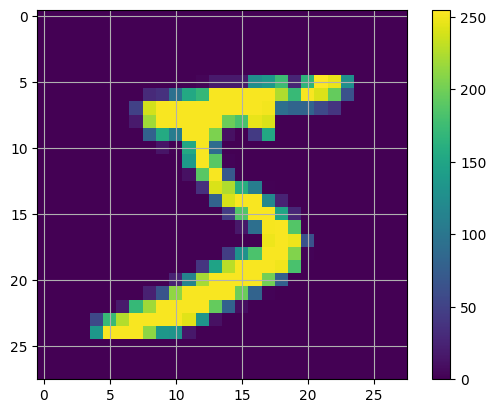

5


In [10]:
#(28,28)형태의 이미지를 plt를 이용하여 출력
plt.figure() #형태를 만들어놓음
plt.imshow(train_images[0]) #이미지를 넣어놓음
plt.colorbar() #옆에 컬러바 보라색은 실제 이미지값 0
plt.grid(True) #격자
plt.show()
print(train_labels[0])

In [11]:
list(filter(lambda x: x !=0, train_images[0].reshape(-1)))[:10] #앞에 있는 조건에 맞는 값만 출력

[3, 18, 18, 18, 126, 136, 175, 26, 166, 255]

In [12]:
#train_images의 dtype을 출력
print(train_images.dtype)
print(train_labels.dtype)
print(test_images.dtype)
print(test_labels.dtype) #양수 int 8비트

uint8
uint8
uint8
uint8


2. 전처리

In [11]:
#train/test 이미지 데이터의 범위 확인
print(list(filter(lambda x: x !=0,train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x !=0,train_labels.reshape(-1)))[:10])
print(list(filter(lambda x: x !=0,test_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x !=0,test_labels.reshape(-1)))[:10])

[1, 13, 73, 1, 4, 1, 1, 3, 36, 136]
[9, 3, 2, 7, 2, 5, 5, 9, 5, 5]
[3, 1, 7, 37, 1, 2, 27, 84, 11, 119]
[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [13]:
#train/test 이미지 데이터의 최소/최대값
print(max(train_images.reshape(-1)),min(train_images.reshape(-1)))
print(max(test_images.reshape(-1)),min(test_images.reshape(-1)))

255 0
255 0


In [17]:
#정수형=>실수형으로 변경 후 dtype로 비교
test_images = test_images.astype(np.float64)
train_images = train_images.astype(np.float64)

In [16]:
#데이터 0-1 노말라이즈 수행((x-(최소))/((최대)-(최소)) 여기선 최소가 0.
train_images = train_images/255
test_images = test_images / 255


3. **시각화**

In [17]:
#train_image의 이미지를 5장 획득하여 (5,28,28)의 shape을 출력
train_images[:5].shape

(5, 28, 28)

In [18]:
#획득한 5장의 이미지를 (28,28*5)의 shape로 변경
# train_images[:5].reshape(28,28*5)이거하면 이미지로 잘 안나옴
np.hstack(train_images[:5]).shape

(28, 140)

In [19]:
#np.hstack은 tensorflow에서 제공하는 방법이 아님. transpose 함수를 이용하여 해봐라
train_images[:5].transpose((1,0,2)).reshape(28,-1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

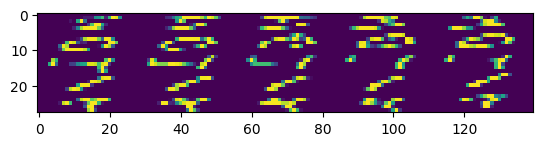

In [20]:
#(28,140)이 된 이미지를 plt로 출력
plt.imshow(train_images[:5].reshape(28,-1)) #이상함
plt.show()

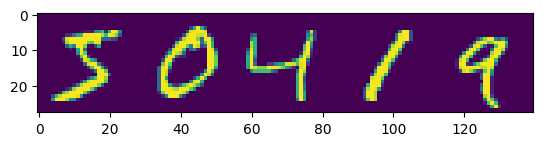

In [21]:
#(28,140)이 된 tensor를 plt로 출력
plt.imshow(np.hstack(train_images[:5]))
plt.show()

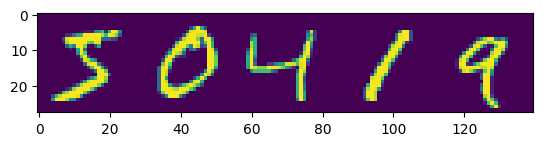

In [22]:
#(28,140)이 된 tensor를 plt로 출력
plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1))
plt.show()

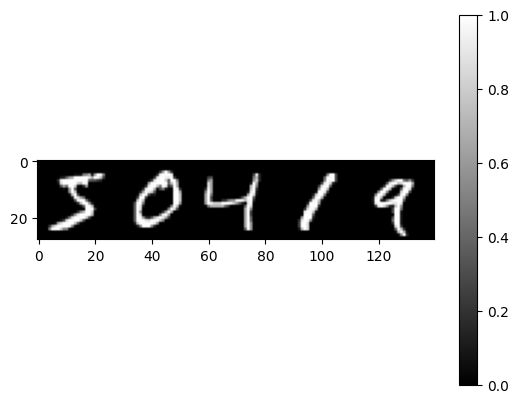

[5 0 4 1 9]


In [23]:
#(28,140)이 된 tensor를 plt로 흑백으로 출력. 해당 labels의 값도 print로 출력
plt.imshow(train_images[:5].transpose((1,0,2)).reshape(28,-1),cmap='gray')
plt.colorbar()
plt.show()
print(train_labels[:5])

4.data augmentation - Noise 추가 방법
(한 데이터를 가지고 여러 데이터로 만듬)

In [24]:
#0-1 사이의 랜덤값을 3회 출력
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.9506260267852918
0.8425025503670309
0.5365413222102592


In [25]:
#np.random.random 함수와 shape 파라미터를 (28,28)의 랜덤 노이즈를 생성
np.random.random((28,28)).shape

(28, 28)

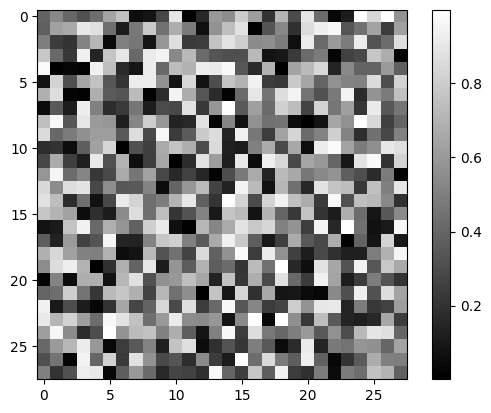

In [26]:
#생성된 random(28,28) 노이즈를 plt를 통하여 확인
plt.imshow(np.random.random((28,28)),cmap='gray')
plt.colorbar()
plt.show()

In [27]:
#가우시안 노이즈 함수를 사용. 평균0, 표편 0.1,사이즈 1로 랜덤 값을 3번 출력
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))

[0.01473735]
[0.03055444]
[-0.01020631]


In [28]:
#가우시안 노이즈 함수를 사용. 평균3, 표편 0.01,사이즈 1로 랜덤 값을 3번 출력
print(np.random.normal(3.0,0.01,1))
print(np.random.normal(3.0,0.01,1))
print(np.random.normal(3.0,0.01,1))

[2.99622861]
[2.98135847]
[2.99177605]


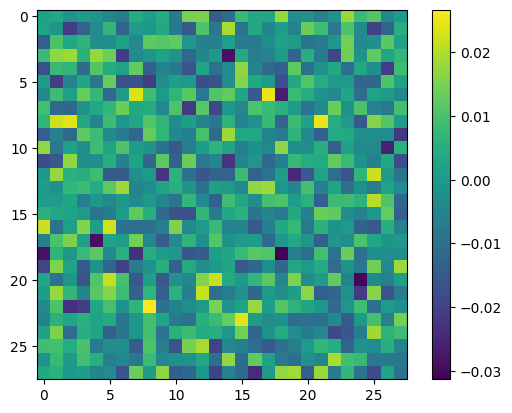

In [29]:
#가우시안 노이즈 함수를 size (28,28)로 생성 후 plt로 출력하는 코드. std=0.01
plt.imshow(np.random.normal(0.0,0.01,(28,28)))
plt.colorbar()
plt.show()

In [30]:
#train_images의 5번째 이미지와 가우시안 노이즈(28,28)를 생성 한 뒤 각각 tensor를 더한 뒤 noisy_image 변수에 할당 해보세요.
noisy_image = train_images[5] + np.random.normal(0.5,0.1,(28,28))

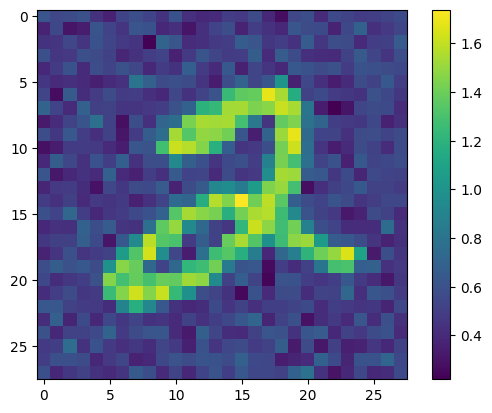

In [31]:
#noisy_image를 plt를 통해 출력(노이즈있음)
plt.imshow(noisy_image)
plt.colorbar()
plt.show()

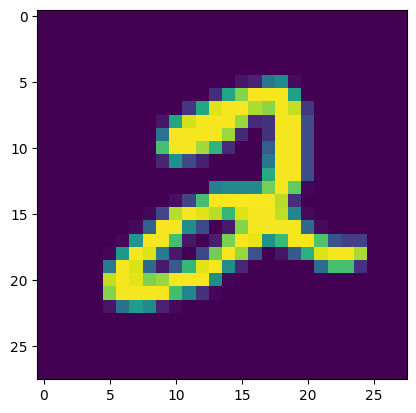

In [32]:
#노이즈 없음
plt.imshow(train_images[5])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

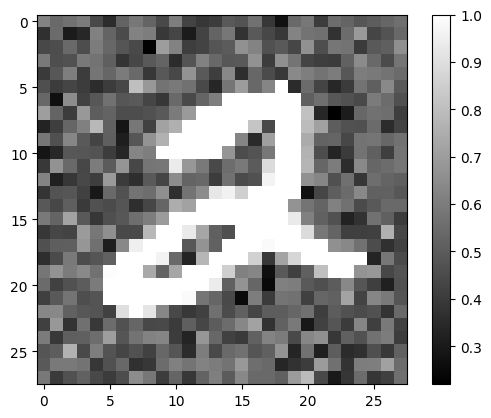

In [33]:
#max가 1을 초과하지 않게 noist_image를 수정한 뒤 plt로 출력
noisy_image[noisy_image > 1.0] = 1.0
plt.imshow(noisy_image,cmap='gray')
plt.colorbar()
plt.show

In [34]:
# trian_images와 test_images 데이터에 랜덤 노이즈를 추가, train_noisy_images와 test_noisy_images를 생성
train_noisy_images = train_images + np.random.normal(0.5,0.1,train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0

test_noisy_images = test_images + np.random.normal(0.5,0.1,test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

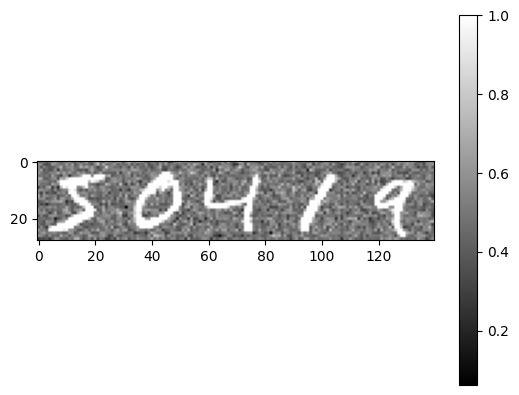

In [35]:
plt.imshow(train_noisy_images[:5].transpose((1,0,2)).reshape(28,-1),cmap='gray')
plt.colorbar()
plt.show()

In [36]:
from keras.utils import to_categorical
to_categorical(4)

array([0., 0., 0., 0., 1.], dtype=float32)

In [37]:
#labels에 onehot인코딩을 적용하여 (배치 사이즈, 클래스 개수)의 shape로 변경
from keras.utils import to_categorical
print(train_labels.shape,test_labels.shape)
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
print(train_labels.shape,test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


5.모델링

In [38]:
#input (28,28), 64 unit의 simple RNN, 10 unit의 fully-contect를 가진 모델을 작성
from keras.layers import SimpleRNN
from keras.layers import Dense,Input
from keras.models import Model

#RNN은 시계열로 처리함 1-28,2-28 ~~이렇게
inputs = Input(shape=(28,28))
x1 = SimpleRNN(64,activation = 'tanh')(inputs)
x2 = Dense(10,activation='softmax')(x1)
model = Model(inputs,x2)

In [39]:
#모델 요약 정보 출력
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                5952      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 6602 (25.79 KB)
Trainable params: 6602 (25.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
#모델에 로스(categorical_crossentropy-차이비교)와 옵티마이저(adam-차이를 어떻게 수정?),메트릭(accuracy-어떤 지표를 볼거냐)을 설정
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [41]:
#train_noisy_images를 학습시키고 5epochs 돌리고 진행 사항을 hist에 저장
hist = model.fit(train_noisy_images,train_labels,validation_data=(test_noisy_images,test_labels),epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 13s - loss: 0.6829 - accuracy: 0.7826 - val_loss: 0.4119 - val_accuracy: 0.8786 - 13s/epoch - 7ms/step
Epoch 2/5
1875/1875 - 11s - loss: 0.3705 - accuracy: 0.8889 - val_loss: 0.3012 - val_accuracy: 0.9113 - 11s/epoch - 6ms/step
Epoch 3/5
1875/1875 - 11s - loss: 0.2989 - accuracy: 0.9111 - val_loss: 0.2881 - val_accuracy: 0.9153 - 11s/epoch - 6ms/step
Epoch 4/5
1875/1875 - 11s - loss: 0.2724 - accuracy: 0.9206 - val_loss: 0.2231 - val_accuracy: 0.9383 - 11s/epoch - 6ms/step
Epoch 5/5
1875/1875 - 12s - loss: 0.2525 - accuracy: 0.9273 - val_loss: 0.2580 - val_accuracy: 0.9274 - 12s/epoch - 6ms/step


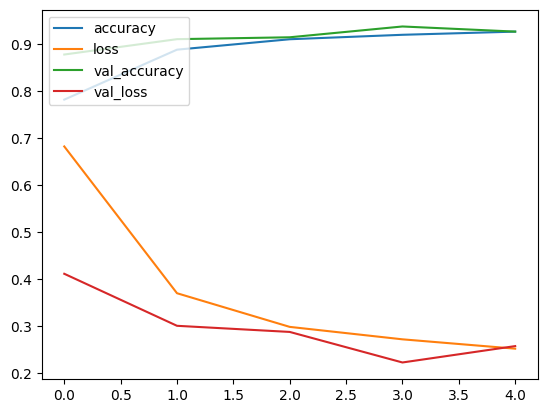

In [42]:
#학습 진행 사항을 plt로 출력(hist의 accuracy plt의 plot을 이용하여 출력하는 코드)
plt.plot(hist.history['accuracy'],label='accuracy') #history는 에폭마다 값을 알려줌
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend(loc='upper left')
plt.show()

6.결과 확인

In [47]:
#모델에 test_noisy_images 중 1장을 넣고 결과를 받는 코드를 작성
res = model.predict(test_noisy_images[3:4])
res.shape

1/1 [==============================] - 0s 75ms/step


(1, 10)

In [46]:
#model.predict(test_noisy_images[0].reshape((1,28,28)))
#model.predict(np.array([test_noisy_images[0]]))

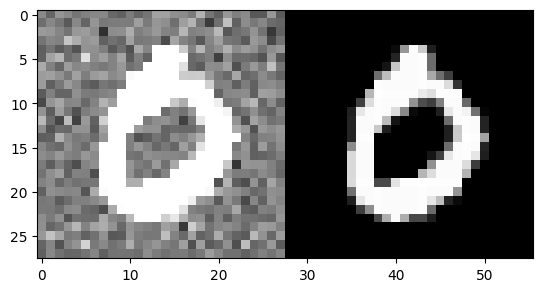

In [50]:
#노이즈 이미지와 그냥 이미지를 width방향으로 결합하여 (28,28*2)의 이미지를 만들어 plt로 출력
plt.imshow(np.concatenate([test_noisy_images[3],test_images[3]],axis=1),cmap='gray')
plt.show()

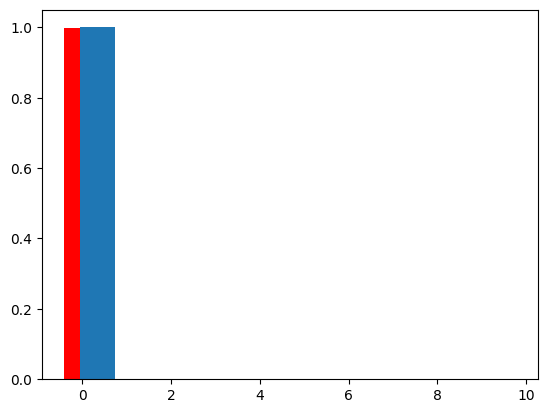

In [52]:
#res와 test_labels[0]의 결과를 plt.bar로 확인
plt.bar(range(10),res[0],color='red')
plt.bar(np.array(range(10))+0.35,test_labels[3])
plt.show()

7.모델 저장  및 로드, 다운

In [53]:
#모델 저장
model.save("./lecture001.h5")

In [56]:
#모델파일을 새로운 모델에 로드
new_model = tf.keras.models.load_model('./lecture001.h5')

1/1 [==============================] - 0s 259ms/step


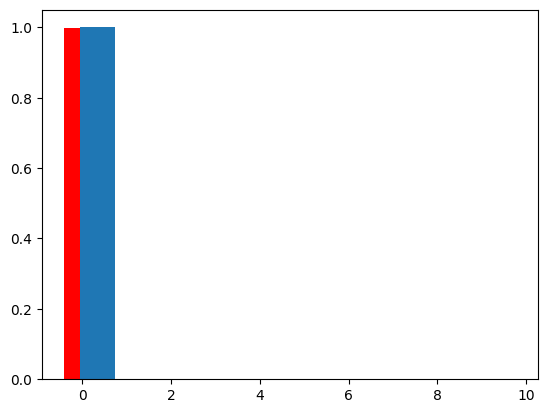

In [57]:
res = new_model.predict(test_noisy_images[3:4])
res.shape
plt.bar(range(10),res[0],color='red')
plt.bar(np.array(range(10))+0.35,test_labels[3])
plt.show()

In [59]:
#로드한 모델을 test 데이터로 평가
loss,acc = new_model.evaluate(test_noisy_images,test_labels,verbose=2)
print(loss,acc)

313/313 - 1s - loss: 0.2580 - accuracy: 0.9274 - 1s/epoch - 4ms/step
0.2579617500305176 0.9273999929428101


In [61]:
#모델을 내 컴퓨터에 저장
from google.colab import files
files.download("./lecture001.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

화질 개선 - 손상된 의류 이미지 화질 복구하기

1. 도입전 기본 처리

In [83]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED=34

In [26]:
#fashion mnist 데이터
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [27]:
#train_images/labels와 test_images/labels의 shape를 출력
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


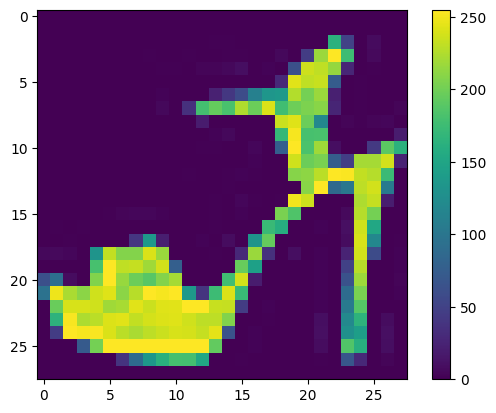

In [28]:
#(28,28)형태의 이미지를 plt를 이용해 출력
plt.imshow(train_images[9])
plt.colorbar()
plt.show()

In [29]:
#하나의 train_images에서 0이 아닌 값들을 출력
list(filter(lambda x:x !=0,train_images[0].reshape(-1)))[:10]

[1, 13, 73, 1, 4, 1, 1, 3, 36, 136]

In [30]:
#train_images의 dtype를 출력
train_images.dtype

dtype('uint8')

2.전처리

In [31]:
#train/test 이미지 데이터의 범위 확인
print(list(filter(lambda x: x !=0,train_images[0].reshape(-1)))[:10])
print(list(filter(lambda x: x !=0,test_images[0].reshape(-1)))[:10])

[1, 13, 73, 1, 4, 1, 1, 3, 36, 136]
[3, 1, 7, 37, 1, 2, 27, 84, 11, 119]


In [32]:
#train/test 이미지 데이터의 최소/최대값
print(max(train_images.reshape(-1)),min(train_images.reshape(-1)))
print(max(test_images.reshape(-1)),min(test_images.reshape(-1)))

255 0
255 0


In [33]:
#정수형=>실수형으로 변경 후 dtype로 비교
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)
(train_images.dtype,test_images.dtype)

(dtype('float64'), dtype('float64'))

In [34]:
#데이터 0-1 노말라이즈 수행((x-(최소))/((최대)-(최소)) 여기선 최소가 0.
train_images = train_images/255
test_images = test_images / 255

In [35]:
#min/max,shape,0이 아닌 값, dtype 등을 확인하는 코드
print(max(train_images.reshape(-1)),min(train_images.reshape(-1)))
print(max(test_images.reshape(-1)),min(test_images.reshape(-1)))
train_images.shape

1.0 0.0
1.0 0.0


(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

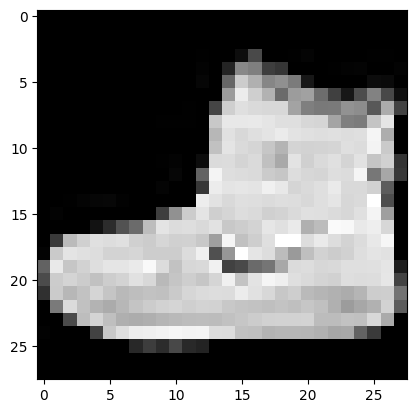

In [36]:
#흑백 이미지를 칼라 이미지의 shape로 변경
from skimage import color
plt.imshow(color.gray2rgb(train_images[0]))
plt.show

In [38]:
#(배치,28,28)의 흑백 shape를 (배치,28,28,3)의 칼라 shape의 영역으로 확대하는 코드 추가
from skimage import color

train_images = np.array([color.gray2rgb(img) for img in train_images])
test_images = np.array([color.gray2rgb(img) for img in test_images])
print(train_images.shape,test_images.shape)

(60000, 28, 28, 3) (10000, 28, 28, 3)


3. 시각화 방법

In [39]:
#train_image의 이미지를 5장 획득하여 (5,28,28,3)의 shape을 출력
train_images[:5].shape

(5, 28, 28, 3)

In [40]:
#획득한 5장의 이미지를 (28,28*5,3)의 shape로 변경
#train_images[:5].reshape(28,28*5,3)이거하면 이미지로 잘 안나옴
#hstack은 (height,image_height,image_width,color)의 shape를 (image_height,image_width*height,color)로 바꾸기 가능
np.hstack(train_images[:5]).shape

(28, 140, 3)

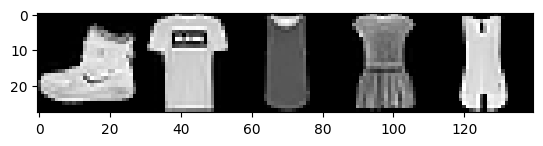

In [42]:
#위에꺼 이미지로 출력
plt.imshow(np.hstack(train_images[:5]))
plt.show()

In [43]:
#np.hstack은 tensorflow에서 제공하는 방법이 아님. transpose 함수를 이용하여 해봐라
train_images[:5].transpose((1,0,2,3)).reshape(28,-1,3).shape

(28, 140, 3)

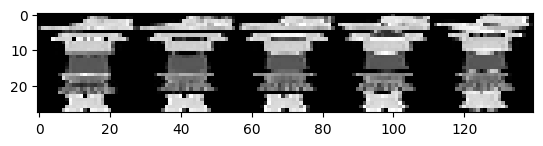

In [44]:
#(28,140,3)이 된 이미지를 plt로 출력
plt.imshow(train_images[:5].reshape(28,-1,3)) #이상함
plt.show()

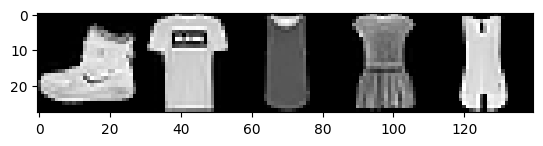

In [48]:
#(28,140,3)이 된 tensor를 plt로 출력
plt.imshow(np.hstack(train_images[:5]))
plt.show()

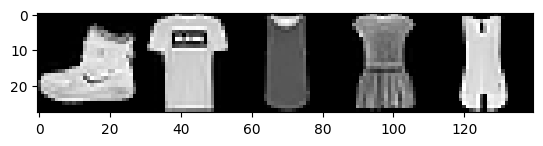

In [47]:
#(28,140,3)이 된 tensor를 plt로 출력
plt.imshow(train_images[:5].transpose((1,0,2,3)).reshape(28,-1,3))
plt.show()

4.data augmentation - Noise 추가 방법
(한 데이터를 가지고 여러 데이터로 만듬)

In [49]:
#0-1 사이의 랜덤값을 3회 출력
print(np.random.random())
print(np.random.random())
print(np.random.random())

0.49270862826463857
0.545366723329756
0.6409125564021374


In [50]:
#np.random.random 함수와 shape 파라미터를 (28,28,3)의 랜덤 노이즈를 생성
np.random.random((28,28,3)).shape

(28, 28, 3)

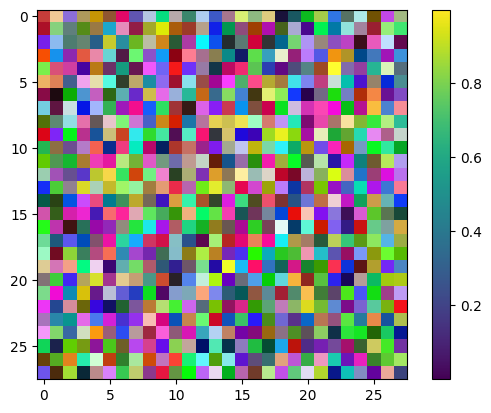

In [51]:
#생성된 random(28,28,3) 노이즈를 plt를 통하여 확인
plt.imshow(np.random.random((28,28,3)))
plt.colorbar()
plt.show()

In [52]:
#가우시안 노이즈 함수를 사용. 평균0, 표편 0.1,사이즈 1로 랜덤 값을 3번 출력
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))
print(np.random.normal(0.0,0.1,1))

[-0.02984954]
[-0.00572566]
[0.02425397]


In [53]:
#가우시안 노이즈 함수를 사용. 평균3, 표편 0.01,사이즈 1로 랜덤 값을 3번 출력
print(np.random.normal(3.0,0.01,1))
print(np.random.normal(3.0,0.01,1))
print(np.random.normal(3.0,0.01,1))

[2.98800388]
[3.00780762]
[3.00303798]


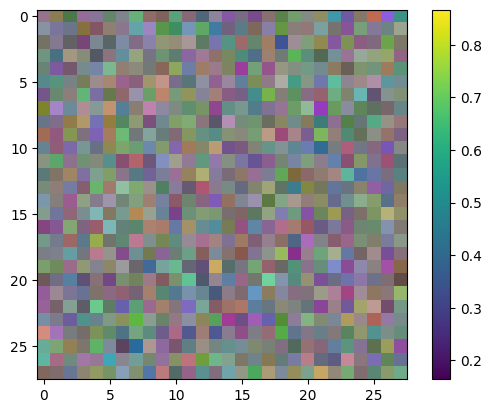

In [56]:
#가우시안 노이즈 함수를 size (28,28,3)로 생성 후 plt로 출력하는 코드.
noisy=np.random.normal(0.5,0.1,(28,28,3))
noisy[noisy>1.0]=1.0
plt.imshow(noisy)
plt.colorbar()
plt.show()

In [59]:
#train_images의 5번째 이미지와 가우시안 노이즈(28,28)를 생성 한 뒤 각각 tensor를 더한 뒤 noisy_image 변수에 할당 해보세요.(mu=0.5,std=0.05)
noisy_image = train_images[5] + noisy
noisy_image[noisy_image>1] = 1.0

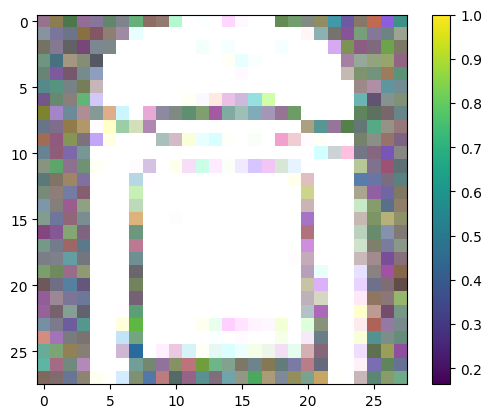

In [60]:
#noisy_image를 plt를 통해 출력(노이즈있음)
plt.imshow(noisy_image)
plt.colorbar()
plt.show()

In [62]:
# trian_images와 test_images 데이터에 랜덤 노이즈를 추가, train_noisy_images와 test_noisy_images를 생성
train_noisy_images = train_images + np.random.normal(0.5,0.05,train_images.shape)
train_noisy_images[train_noisy_images > 1.0] = 1.0

test_noisy_images = test_images + np.random.normal(0.5,0.05,test_images.shape)
test_noisy_images[test_noisy_images > 1.0] = 1.0

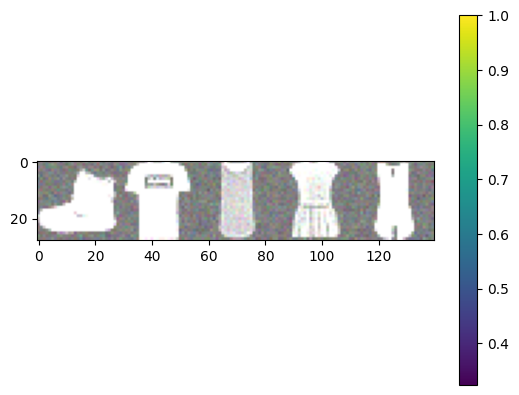

In [63]:
plt.imshow(train_noisy_images[:5].transpose((1,0,2,3)).reshape(28,-1,3))
plt.colorbar()
plt.show()

In [ ]:
from keras.utils import to_categorical
to_categorical(4)

array([0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
#labels에 onehot인코딩을 적용하여 (배치 사이즈, 클래스 개수)의 shape로 변경
from keras.utils import to_categorical
print(train_labels.shape,test_labels.shape)
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
print(train_labels.shape,test_labels.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


5.모델링

In [65]:
#input (28,28,3), output (28,28,3)을 처리할 수 있는 모래시계 모양의 모델을 작성
from keras.layers import Dense,Input,Conv2D,Conv2DTranspose,Flatten,Reshape
from keras.models import Model

#RNN은 시계열로 처리함 1-28,2-28 ~~이렇게 이건 CNN
inputs = Input(shape=(28,28,3))
x = Conv2D(32,3,2,activation = 'relu',padding='same')(inputs)
x = Conv2D(64,3,2,activation='relu',padding='same')(x)
x = Flatten()(x)
latent = Dense(10)(x)

x = Dense(7*7*64)(latent)
x = Reshape((7,7,64))(x)
x = Conv2DTranspose(64,3,2,activation='relu',padding='same')(x)
x = Conv2DTranspose(32,3,2,activation='relu',padding='same')(x)
x = Conv2DTranspose(3,3,activation='sigmoid',padding='same')(x)
model = Model(inputs,x)

In [66]:
#모델 요약 정보 출력
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                31370     
                                                                 
 dense_3 (Dense)             (None, 3136)              34496     
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 64)          0     

In [67]:
#모델에 로스(categorical_crossentropy-차이비교)와 옵티마이저(adam-차이를 어떻게 수정?),메트릭(accuracy-어떤 지표를 볼거냐)을 설정
model.compile(loss="mse",optimizer='adam',metrics=['accuracy'])

In [69]:
#train_noisy_images를 학습시키고 5 epochs 돌리고 진행 사항을 hist에 저장
hist = model.fit(train_noisy_images,train_images,validation_data=(test_noisy_images,test_images),epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 105s - loss: 0.0185 - accuracy: 0.2886 - val_loss: 0.0176 - val_accuracy: 0.2947 - 105s/epoch - 56ms/step
Epoch 2/5
1875/1875 - 104s - loss: 0.0169 - accuracy: 0.3355 - val_loss: 0.0162 - val_accuracy: 0.3629 - 104s/epoch - 56ms/step
Epoch 3/5
1875/1875 - 108s - loss: 0.0161 - accuracy: 0.3766 - val_loss: 0.0157 - val_accuracy: 0.3655 - 108s/epoch - 58ms/step
Epoch 4/5
1875/1875 - 106s - loss: 0.0156 - accuracy: 0.3804 - val_loss: 0.0154 - val_accuracy: 0.3866 - 106s/epoch - 57ms/step
Epoch 5/5
1875/1875 - 115s - loss: 0.0151 - accuracy: 0.3902 - val_loss: 0.0150 - val_accuracy: 0.3975 - 115s/epoch - 61ms/step


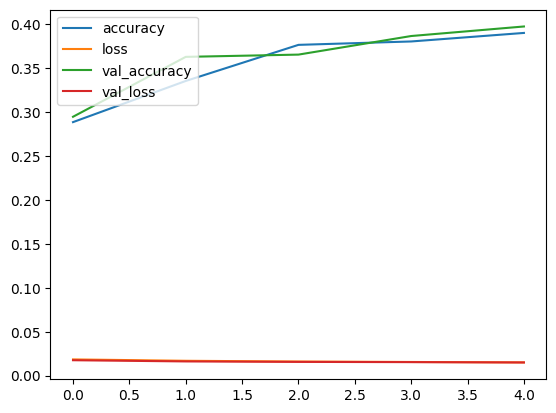

In [70]:
#학습 진행 사항을 plt로 출력(hist의 accuracy plt의 plot을 이용하여 출력하는 코드)
plt.plot(hist.history['accuracy'],label='accuracy') #history는 에폭마다 값을 알려줌
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend(loc='upper left')
plt.show()

6.결과 확인

In [71]:
#모델에 test_noisy_images 중 1장을 넣고 결과를 받는 코드를 작성
res = model.predict(test_noisy_images[5:6])
res.shape

1/1 [==============================] - 0s 192ms/step


(1, 28, 28, 3)

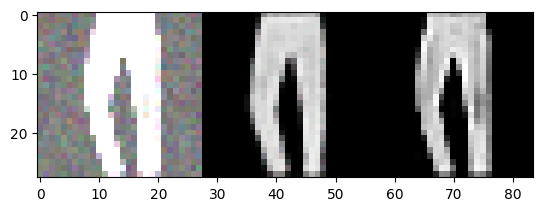

In [73]:
#res와 test_noisy_images와 test_images[0]를 width방향으로 결합하여 (28,28*2)의 이미지를 만들어 plt로 출력
plt.imshow(np.concatenate([test_noisy_images[5],res[0],test_images[5]],axis=1))
plt.show()

1/1 [==============================] - 0s 26ms/step


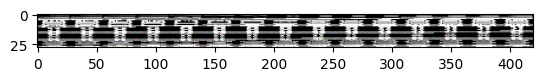

In [89]:
#5장의 test_noisy_images를 모델에 넣은 뒤 결과를 비교
five = model.predict(test_noisy_images[:5])
result = np.concatenate([test_images[:5],five,test_noisy_images[:5]],axis = 1).reshape(28,-1,3)
#result = np.concatenate([test_images[:5],five,test_noisy_images[:5]],axis = 2).transpose((1,0,2,3)).reshape(28,-1,3)
#위에 코드의 그림은 왜 이상하게 나오나요?
plt.imshow(result)
plt.show()

7.모델 저장  및 로드, 다운

In [90]:
#모델 저장
model.save("./lecture002.h5") #모델 웨이트

In [91]:
#모델파일을 새로운 모델에 로드
new_model = tf.keras.models.load_model('./lecture002.h5')

In [93]:
#로드한 모델을 test 데이터로 평가
loss,acc = model.evaluate(test_noisy_images,test_images,verbose=1)
print(loss,acc)
loss,acc = new_model.evaluate(test_noisy_images,test_images,verbose=1)
print(loss,acc)

313/313 [==============================] - 8s 25ms/step - loss: 0.0150 - accuracy: 0.3975
0.015010070987045765 0.39750510454177856
313/313 [==============================] - 8s 25ms/step - loss: 0.0150 - accuracy: 0.3975
0.015010070987045765 0.39750510454177856


In [94]:
#모델을 내 컴퓨터에 저장
from google.colab import files
files.download("./lecture002.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>